#  Haberman dataset for cancer diagnosis 

It is dataset of cancer operated people which shows age, operation year,Axillary nodes detected and what is the survival status of respective patient
Axillary nodes are small nodes near armpit which play important role as infection fighters and also these are the most affected area near cancer tumour.
So, our dataset will provide us the analysis of Cancer survival status with help of all datapoints

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

haberman= pd.read_csv("haberman.csv")


This command shows that it has 306 data with 4 datapoint

In [8]:
print(haberman.shape)

(306, 4)


This is showing the cloumns name 

In [9]:
print(haberman.columns)

Index(['Age', 'Operation_Age', 'Axillary_Nodes', 'Survival_Status'], dtype='object')


In [10]:
haberman["Survival_Status"].value_counts()

1    225
2     81
Name: Survival_Status, dtype: int64

Above figure shows that there are 255 patient who survived more than 5 years and 81 patient who live for short perriod of time

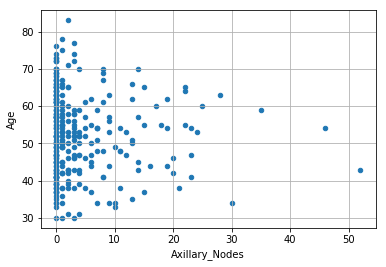

In [11]:
haberman.plot(kind='scatter', x='Axillary_Nodes', y='Age') 
plt.grid()
plt.show()

In above plot cannot distinguish between any of datapoint and also not able distinguish between the features

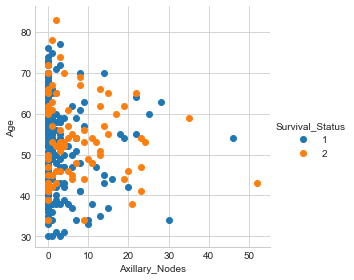

In [12]:
sns.set_style('whitegrid')
sns.FacetGrid(haberman, hue="Survival_Status", size=4) \
   .map(plt.scatter, "Axillary_Nodes", "Age") \
   .add_legend();
plt.show();


In above graph points are separated and can be distinguished by different colors but we cannot distinguished if any point is overlap

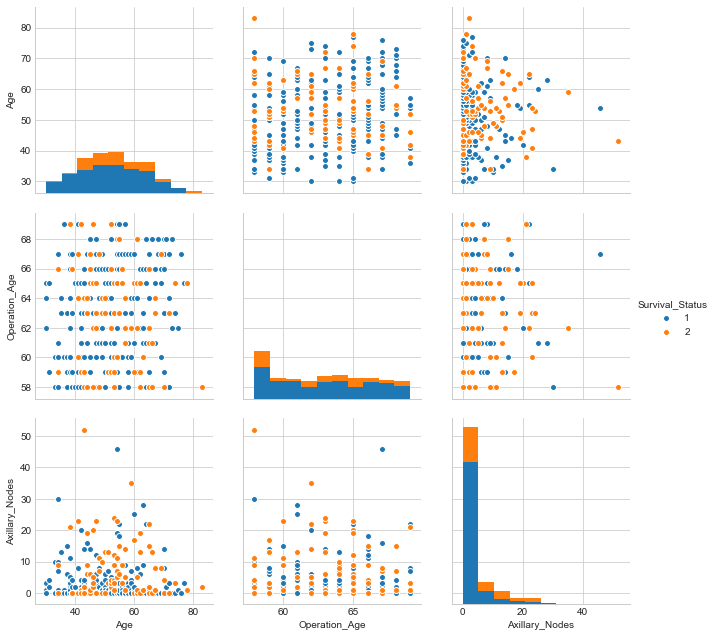

In [13]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="Survival_Status", size=3, vars=['Age','Operation_Age', 'Axillary_Nodes'])
plt.show()

In above pairplot we can see the probablities of different feature showing there graph accordingly and observed that only Age and Axillary nodes can be used to classify between long and short survival all other feature not clearly showcase the graph instead most of the points may overlap which may not be visible to us.
So, we perform operations on Age and Axillary nodes

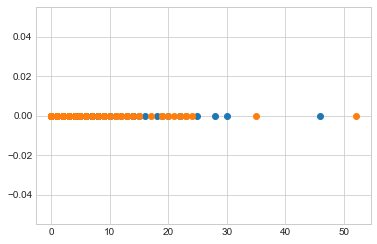

In [14]:
import numpy as np
haberman_Long_Survive = haberman.loc[haberman["Survival_Status"] == 1];
haberman_Short_Survive = haberman.loc[haberman["Survival_Status"] == 2];
#print(iris_setosa["petal_length"])
plt.plot(haberman_Long_Survive["Axillary_Nodes"], np.zeros_like(haberman_Long_Survive['Axillary_Nodes']), 'o')
plt.plot(haberman_Short_Survive["Axillary_Nodes"], np.zeros_like(haberman_Short_Survive['Axillary_Nodes']), 'o')
plt.show()

In 1D Scatter plot it is impossible to detect overlapping points

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


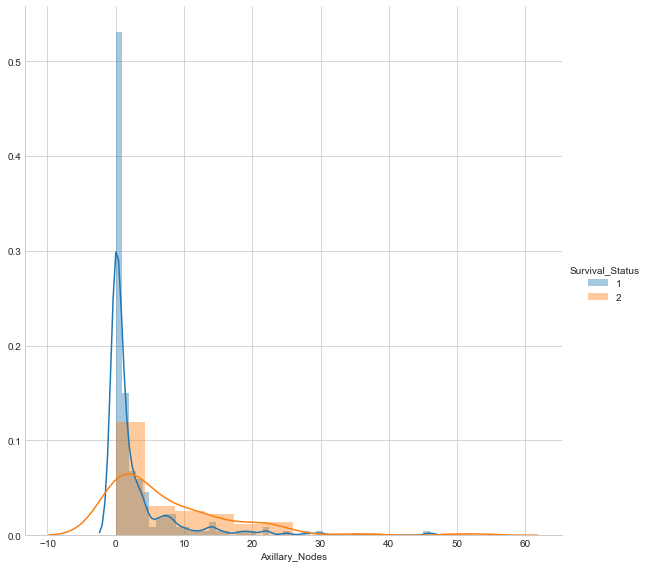

In [15]:
sns.FacetGrid(haberman,hue="Survival_Status", size=8)\
.map(sns.distplot,"Axillary_Nodes")\
.add_legend()

1.It has been observed that people survive long if they have less axillary nodes detected and vice versa but still it is hard to classify                    
2.It is observed that if Axillary_Nodes nodes as less there is more 1 ie more long term survival

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


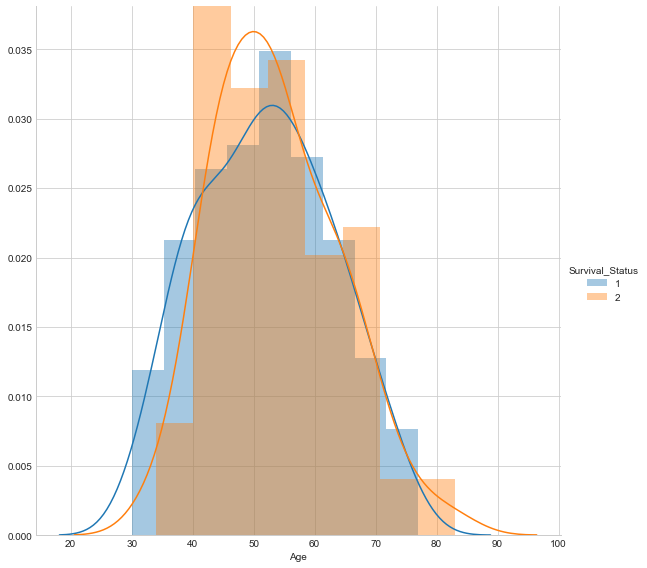

In [22]:
sns.FacetGrid(haberman,hue="Survival_Status", size=8)\
.map(sns.distplot,"Age")\
.add_legend()

In above plot it is observed that at the age range from 30-75 the status of survival and death is same. So, using this datapoint we cannot predict anything

In [ ]:
sns.FacetGrid(haberman,hue="Survival_Status", height=8)\
.map(sns.distplot,"Operation_Age")\
.add_legend()

Similar here we cannot predict anything with these histograms as there is equal number of density in each datapoint


In [ ]:
counts, bin_edges = np.histogram(haberman_Long_Survive['Axillary_Nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(haberman_Long_Survive['Axillary_Nodes'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

plt.show();

In the above PDF ie blue line shows there is a 85% chance of long survival if number of axillary nodes detected are < 5. 
Also you can see as number of axillary nodes increases survival chances also reduces

In [ ]:
counts, bin_edges = np.histogram(haberman_Long_Survive['Axillary_Nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



plt.show();

In above CDF it is clearly observed that 80% - 85% of people have good chances of survival if they have less no of aux nodes detected and as nodes increases the survival status also decreases as a result 100% of people have less chances of survival if nodes increases >40

In [ ]:
# Long survival using Axillary_Nodes
counts, bin_edges = np.histogram(haberman_Long_Survive['Axillary_Nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# Short survival using Axillary_Nodes
counts, bin_edges = np.histogram(haberman_Short_Survive['Axillary_Nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


plt.show();

In above combine CDF for Long survival observation is same but in Short survival nearly 55% of people who have nodes less than 5 and there are nearly 100% of people in short survival if nodes are > 40

In [17]:
print("Means:")
print (np.mean(haberman_Long_Survive["Axillary_Nodes"]))
print (np.mean(np.append(haberman_Long_Survive["Axillary_Nodes"],50)))
print (np.mean(haberman_Short_Survive["Axillary_Nodes"]))

print("\nStandard Deviation:")
print(np.mean(haberman_Long_Survive["Axillary_Nodes"]))
print(np.mean(haberman_Short_Survive["Axillary_Nodes"]))


Means:
2.7911111111111113
3.0
7.45679012345679

Standard Deviation:
2.7911111111111113
7.45679012345679


1.Just looking at the mean we can say that Axillary nodes of long survival patient is very low near to 3 on average even if any outlier in dataset and similar for short survival nodes are nearly 7                                
2.Also Std dev shows that the area spread for Long survival is less compared to short survival.

In [18]:
print("Medians:")
print(np.median(haberman_Long_Survive["Axillary_Nodes"]))
print(np.median(np.append(haberman_Long_Survive["Axillary_Nodes"],50)))
print(np.median(haberman_Short_Survive["Axillary_Nodes"]))

print("\nQuantiles:")
print(np.percentile(haberman_Long_Survive["Axillary_Nodes"],np.arange(0,100,25)))
print(np.percentile(haberman_Short_Survive["Axillary_Nodes"],np.arange(0,100,25)))

print("\n90th percentile:")
print(np.percentile(haberman_Long_Survive["Axillary_Nodes"],90))
print(np.percentile(haberman_Short_Survive["Axillary_Nodes"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(haberman_Long_Survive["Axillary_Nodes"]))
print(robust.mad(haberman_Short_Survive["Axillary_Nodes"]))

Medians:
0.0
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th percentile:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


1.From above observation it is clear that average axillary nodes in long survival is 0 and for short survival it is 4. ie, Patients who have average 4 auxillary nodes have short survival status.                       
2. Quantiles shows that nearly 50th% of axillary nodes are 0 in long survival and 75th% of patients have nodes less than 3 that is 25% patients are having nodes more than 3.
3. Similarly, In short survival 75th% of patients have minimum 11 nodes detected.
4. At 90th% there if nodes detected is >8 then it has long survival status and if nodes are >20 then patients will have short survival status

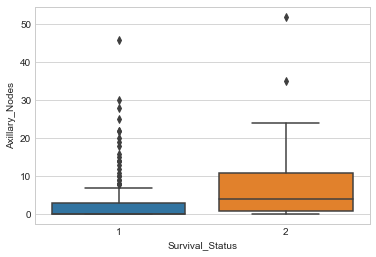

In [19]:
sns.boxplot(x="Survival_Status",y="Axillary_Nodes", data=haberman)
plt.show()

In above box whiskers 25th percentile and  50th percentile are nearly same for Long survive and threshold for it is 0 to 7. Also, for short survival there are 50th percentile of nodes are nearly same as long survive 75th percentile. Threshold for the Short survival us 0 to 25 nodes and 75th% is 12 and 25th% is 1 or 2


So,if nodes between 0-7 have chances of error as short survival plot is also lies in it.ie 50% error for Short survival status

There are most of point above 12 lies in Short survival

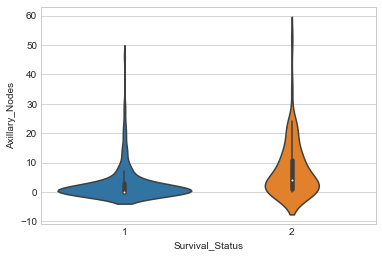

In [20]:
sns.violinplot(x="Survival_Status", y="Axillary_Nodes",data=haberman)
plt.legend
plt.show()

1.In above violin plot we observe that For long survive density for it is more near the 0 nodes and also it has whiskers in range o-7                                                                                                                     2.In violin 2 it shows the short survival density more from 0-20 ans threshold from 0-12

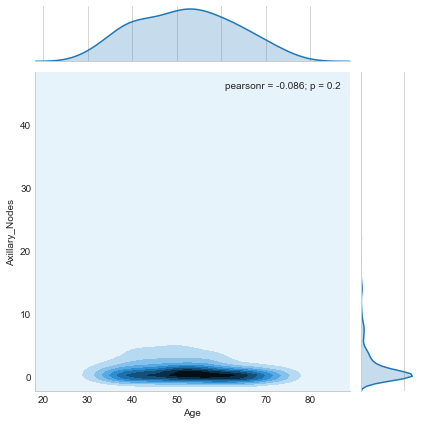

In [21]:
sns.jointplot(x="Age",y="Axillary_Nodes",data=haberman_Long_Survive,kind="kde")
plt.grid()
plt.show()

Above is the 2D density plot for long survival using feature age and axillary nodes, it is observed the density of point for long survival is more from age range 47-60 and axillary nodes from 0-3.
The dark area have major density which is hill top in 3D and density is getting low as graph get ligher. Each shade represent 1 coutour plot